<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_08_diferenciacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de derivadas


## Diferencias finitas de primer orden
El método de diferencias finitas aproxima derivadas numéricamente.


- Aproximación de primer orden hacia adelante:

\begin{equation}
      f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}
\end{equation}

- Aproximación de primer orden hacia atrás:

\begin{equation}
      f'(x_k) \approx \frac{f(x_k) - f(x_{k-1})}{h}
\end{equation}



\begin{equation}
\text{Error} = \frac{h}{2} f''(\xi)
\end{equation}

donde $x$ está entre $x_k$ y $x_{k+1}$.
## Diferencias finitas de segundo orden, diferencia central


Utilizando la fórmula de Taylor de segundo grado:
\begin{equation}
f(x) = f(x_k) + f'(x_k)(x - x_k) + \frac{f''(x_k)}{2}(x - x_k)^2 + R_2
\end{equation}

Evaluando en $x = x_{k+1} y x = x_{k-1}$:
\begin{equation}
f(x_{k+1}) = f(x_k) + f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

\begin{equation}
f(x_{k-1}) = f(x_k) - f'(x_k)h + \frac{f''(x_k)}{2}h^2 + O(h^3)
\end{equation}

Restando estas ecuaciones y despejando $f'(x_k)$:

\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}




El error en la la aproximación de segundo orden es:
\begin{equation}
f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}
\end{equation}

El error de truncamiento es:
\begin{equation}
\text{Error} = \frac{h^2}{6} f'''(\xi)
\end{equation}

donde $\xi$ está entre $x_{k-1}$ y $x_{k+1}$.


# Actividad

1. Construya una función que permita calcular la derivada de una funcion empleando el metodo de diferencias centrales para aproximar el cálculo de la derivada con la función:

$y=e^{x^2}\sin x $

Compruebe  su solución empleando la derivada de sympy.

Analice que  pasa con la derivada cuando varia el valor de h.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

In [ ]:
def diferencias_centrales(fun,x,h):  #fun=funcion pra el calculo de la derivada. x= punto en el que se realizara el caldulo de la derivad. h= diferencail dx
  derivada= (fun(x+h)-fun(x-h))/(2*h)
  return derivada

In [ ]:
fun=lambda x: np.exp(x**2)*np.sin(x)
x=np.linspace(-1,1,100)
derivada=diferencias_centrales(fun,x,h=1e-2)

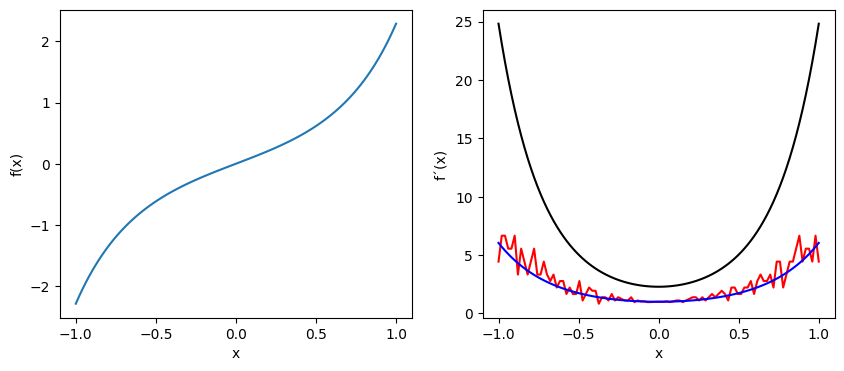

In [ ]:
fig, axs = plt.subplots(figsize=(10,4), ncols=2, nrows=1)
ax=axs.flatten()
ax[0].plot(x, fun(x))
ax[0].set_ylabel("f(x)")
ax[0].set_xlabel("x")

derivada = diferencias_centrales(fun, x, h=1e-16)
ax[1].plot(x, derivada, 'r')
derivada = diferencias_centrales(fun, x, h=1)
ax[1].plot(x, derivada, 'k')
derivada = diferencias_centrales(fun, x, h=1e-10)
ax[1].plot(x, derivada, 'b')
ax[1].set_ylabel("f´(x)")
ax[1].set_xlabel("x")
plt.show()

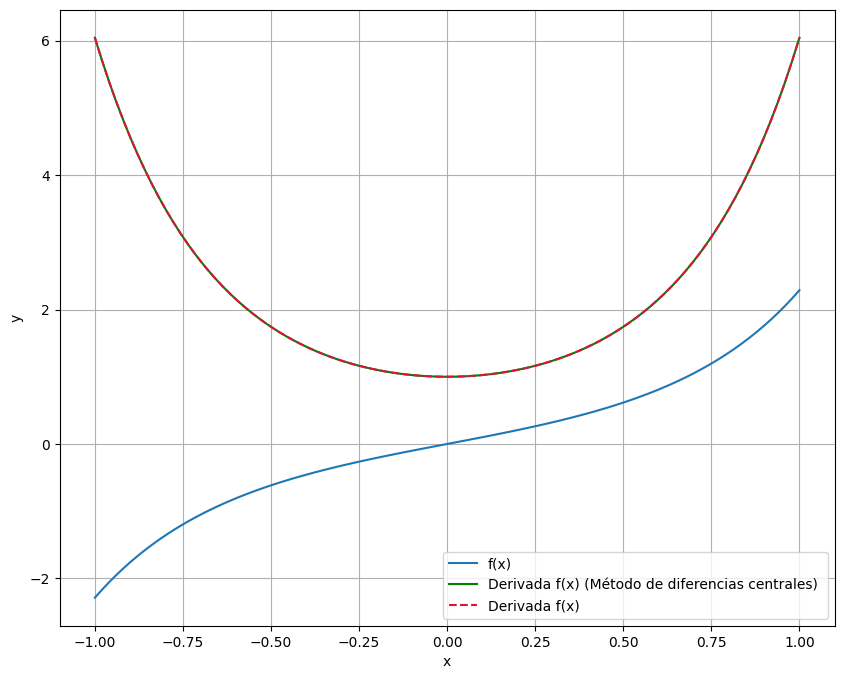

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x, fun(x),label="f(x)")
plt.plot(x,derivada,label="Derivada f(x) (Método de diferencias centrales) ", color='green')
plt.plot(x,derivada,"--",label="Derivada f(x)", color='crimson')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

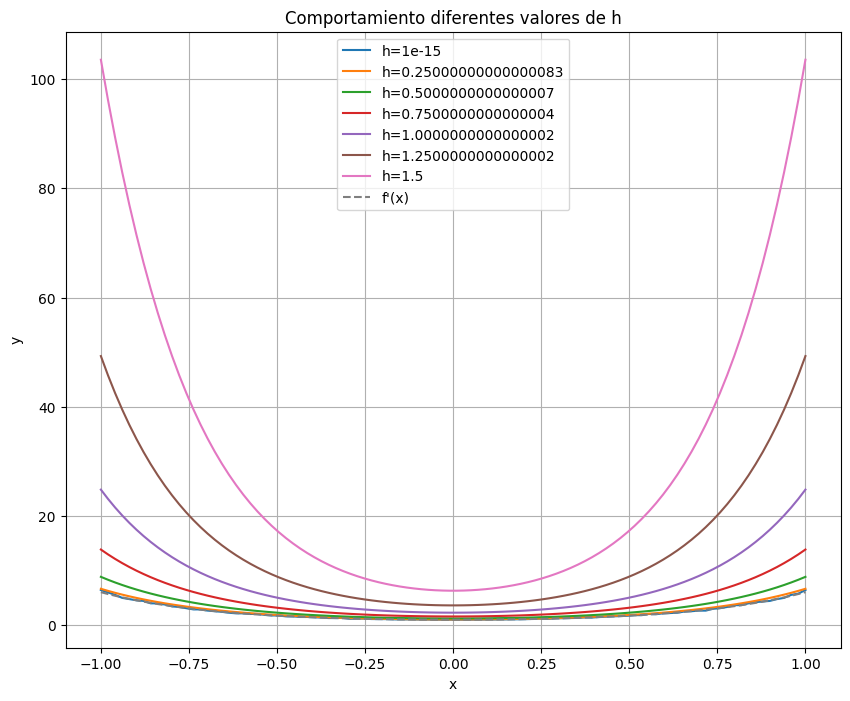

In [ ]:
# Veamos que pasa a medida que aumenta el valor de h
plt.figure(figsize=(10,8))
h = np.linspace(1e-15,1.5,7)
for i in h:
  d = diferencias_centrales(fun,x,i)
  plt.plot(x, d, label=f"h={i}")
plt.plot(x,derivada,"--",label="f'(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title('Comportamiento diferentes valores de h')
plt.legend()
plt.grid()
plt.show()

2. Construya una función que permita calcular el metodo de diferencias centrales derivada para los siguientes puntos experimentales, emplee una pandas.



In [ ]:
link='https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/datos_pendulo.csv'
df=pd.read_csv(link)
df

,Unnamed: 0,Tiempo[ms],AnguloDeg,AnguloRad
0,0,9,-30.710388,-0.535997
1,1,42,-30.017673,-0.523907
2,2,75,-28.762547,-0.502001
3,3,108,-26.507523,-0.462644
4,4,142,-24.611229,-0.429547
...,...,...,...,...
2842,2842,94709,4.937576,0.086177
2843,2843,94743,6.479851,0.113095
2844,2844,94776,7.940689,0.138591
2845,2845,94809,9.318092,0.162631


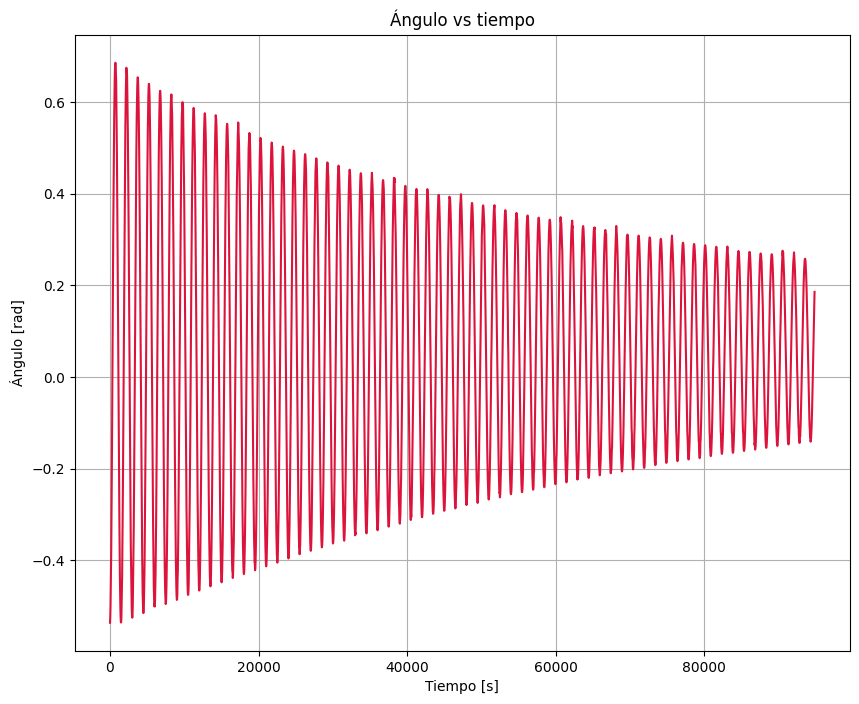

In [ ]:
x=np.array(df["Tiempo[ms]"]) #teimpos
y=np.array(df["AnguloRad"]) #ángulos
plt.figure(figsize=(10,8))
plt.plot(x,y, color='crimson')
plt.xlabel("Tiempo [s]")
plt.ylabel("Ángulo [rad]")
plt.title("Ángulo vs tiempo")
plt.grid()
plt.show()

In [ ]:
def diferencias_centrales(x,f):
  h=x[1]-x[0]
  derivada=(f[2:]-f[:-2])/(2*h)
  return derivada

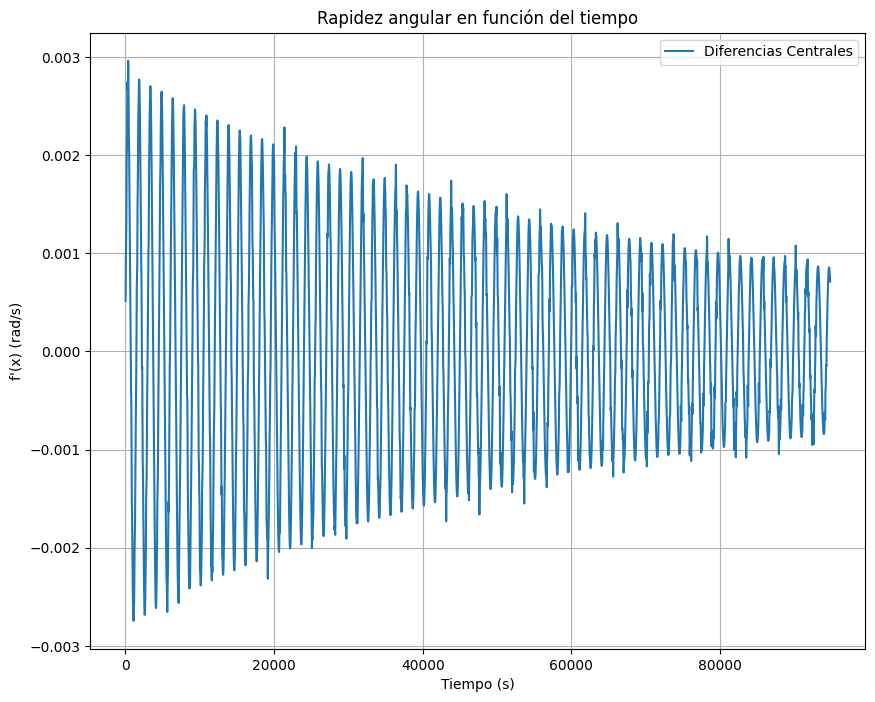

In [ ]:
derivada = diferencias_centrales(x, y)
plt.figure(figsize=(10,8))
plt.plot(x[1:-1], derivada, label="Diferencias Centrales")
plt.xlabel("Tiempo (s)")
plt.ylabel("f'(x) (rad/s)")
plt.title("Rapidez angular en función del tiempo")
plt.legend()
plt.grid()
plt.show()

3. El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo np.grad

3. Calcular el campo para diferentes valores de z con z>0,,  empleando np.grad Construya un gráfico de E vs z.


In [2]:
#1).
z, R, k, q_tot = sp.symbols('z R k q_tot')
V=k*q_tot/sp.sqrt(z**2+R**2) #potencial
E_z=-sp.diff(V, z) #campo eléctrico (derivada negativa del potencial)
print("Campo eléctrico (E): \n")
E_z

Campo eléctrico (E): 



k*q_tot*z/(R**2 + z**2)**(3/2)

El campo eléctrico reescalado será $\frac {E}{kq_{tot}}$, es decir:$$\frac {E}{kq_{tot}}=\frac{z}{\sqrt{z^2+R^2}}$$

In [3]:
E_resc=E_z/(k*q_tot)
E_resc

z/(R**2 + z**2)**(3/2)

In [11]:
#2). Campo eléctrico para z>0 mediante el gradiente del potencial

R= 0.1  #en mm
kq_tot = 1  #asumimos kq_tot = 1 para reescalar
def Potencial(z, R, kq_tot):
  return kq_tot/np.sqrt(z**2+R**2)

#Campo eléctrico en z=0.1m
z=0.1  #mm
dz=np.array([z, z + 1e-10])  #dz para el cálculo de gradiente
E_gradiente=-np.gradient(Potencial(dz, R, kq_tot), dz)
print("Campo eléctrico en z = 0.1 mm:", E_gradiente[0])

Campo eléctrico en z = 0.1 mm: 35.355329535722746


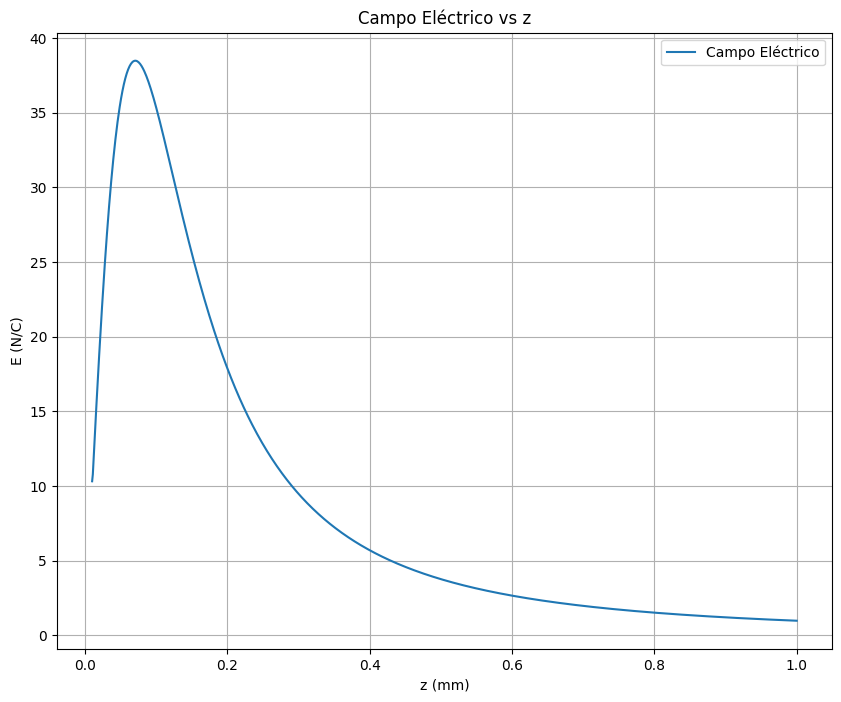

In [12]:
#3) Campo eléctrico para diferentes valores de z

zs=np.linspace(0.01,1,1000)
V= Potencial(zs, R, kq_tot) #potencial para cada valor de z
E= -np.gradient(V, zs)

plt.figure(figsize=(10,8))
plt.plot(zs, E, label='Campo Eléctrico')
plt.xlabel('z (mm)')
plt.ylabel('E (N/C)')
plt.title('Campo Eléctrico vs z')
plt.legend()
plt.grid(True)
plt.show()